# Reproducibility 1: figure 2

In [1]:

from dlim.model import DLIM 
from dlim.dataset import Data_model
from dlim.api import DLIM_API
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from numpy.random import choice
from src_simulate_data.sim_data import Simulated

In [2]:
# type_f = "tgaus"
type_f = "bio" 
nb_var = 30
data_simulated = Simulated(nb_var, type_f)
data = Data_model(data=pd.DataFrame(data_simulated.data), n_variables=2)
model_save_path = None 

In [4]:

train_id_all = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)
train_id = choice(train_id_all, int(len(train_id_all)*0.9), replace=False)
test_id = [i for i in train_id_all if i not in train_id]
val_id = [i for i in range(data.data.shape[0]) if i not in train_id_all]
train_data = data.subset(train_id)
test_data =  data.subset(test_id)
val_data = data.subset(val_id)

## With spectral initialization 

In [5]:
from tqdm import tqdm 
results = []
for id in tqdm(range(30)):
    model = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 0)
    dlim_regressor = DLIM_API(model=model, flag_spectral=True)
    losses = dlim_regressor.fit(train_data, test_data, lr = 1e-3, nb_epoch=300, batch_size=32, emb_regularization=0, \
                                save_path= model_save_path)
    fit_a, var_a, lat_a = dlim_regressor.predict(val_data.data[:,:-1], detach=True) 
    r1 = spearmanr(dlim_regressor.model.genes_emb[0].detach(), data_simulated.A)[0]
    r2 = spearmanr(dlim_regressor.model.genes_emb[1].detach(), data_simulated.B)[0]
    results += [[r1, r2]]



  0%|          | 0/30 [00:00<?, ?it/s]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


  3%|▎         | 1/30 [00:03<01:37,  3.35s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


  7%|▋         | 2/30 [00:07<01:43,  3.70s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 10%|█         | 3/30 [00:10<01:30,  3.36s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 13%|█▎        | 4/30 [00:12<01:18,  3.01s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 17%|█▋        | 5/30 [00:16<01:21,  3.28s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 20%|██        | 6/30 [00:19<01:19,  3.32s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 23%|██▎       | 7/30 [00:21<01:03,  2.77s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 27%|██▋       | 8/30 [00:24<00:59,  2.72s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 30%|███       | 9/30 [00:26<00:56,  2.71s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 33%|███▎      | 10/30 [00:29<00:53,  2.67s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 37%|███▋      | 11/30 [00:32<00:51,  2.72s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 40%|████      | 12/30 [00:34<00:47,  2.67s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 43%|████▎     | 13/30 [00:36<00:40,  2.41s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 47%|████▋     | 14/30 [00:40<00:44,  2.78s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 50%|█████     | 15/30 [00:42<00:40,  2.73s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 53%|█████▎    | 16/30 [00:45<00:38,  2.78s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 57%|█████▋    | 17/30 [00:47<00:33,  2.55s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 60%|██████    | 18/30 [00:50<00:32,  2.68s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 63%|██████▎   | 19/30 [00:53<00:29,  2.68s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 67%|██████▋   | 20/30 [00:58<00:32,  3.27s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 70%|███████   | 21/30 [01:02<00:31,  3.51s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 73%|███████▎  | 22/30 [01:05<00:27,  3.39s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 77%|███████▋  | 23/30 [01:09<00:25,  3.69s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 80%|████████  | 24/30 [01:12<00:19,  3.31s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 83%|████████▎ | 25/30 [01:16<00:18,  3.67s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 87%|████████▋ | 26/30 [01:19<00:13,  3.42s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 90%|█████████ | 27/30 [01:22<00:09,  3.26s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 93%|█████████▎| 28/30 [01:26<00:07,  3.55s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 97%|█████████▋| 29/30 [01:29<00:03,  3.50s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


100%|██████████| 30/30 [01:32<00:00,  3.09s/it]


In [6]:
res_pd = pd.DataFrame(results, columns=['spearman 1', 'spearman 2'])
res_pd.to_csv('results/' + str(type_f) + '.csv')

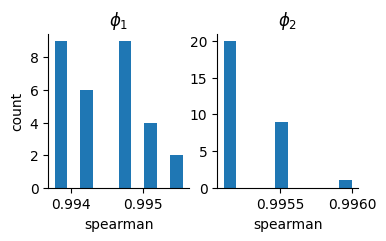

In [7]:
fig, axes = plt.subplots(1,2, figsize = (4, 2))
axes[0].hist(res_pd['spearman 1'].apply(lambda x: abs(x)))
axes[1].hist(res_pd['spearman 2'].apply(lambda x: abs(x)))
axes[0].set_title('$\phi_1$')
axes[1].set_title('$\phi_2$')
axes[0].set_ylabel('count')
axes[0].set_xlabel('spearman')
axes[1].set_xlabel('spearman')
for xx in axes:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)


  0%|          | 0/30 [00:00<?, ?it/s]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


  3%|▎         | 1/30 [00:04<02:15,  4.66s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


  7%|▋         | 2/30 [00:09<02:11,  4.70s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 10%|█         | 3/30 [00:14<02:12,  4.92s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 13%|█▎        | 4/30 [00:19<02:09,  4.96s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 17%|█▋        | 5/30 [00:24<02:01,  4.85s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 20%|██        | 6/30 [00:28<01:54,  4.78s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 23%|██▎       | 7/30 [00:33<01:48,  4.73s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 27%|██▋       | 8/30 [00:38<01:43,  4.70s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 30%|███       | 9/30 [00:42<01:38,  4.68s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 33%|███▎      | 10/30 [00:47<01:33,  4.66s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 37%|███▋      | 11/30 [00:52<01:28,  4.66s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 40%|████      | 12/30 [00:56<01:24,  4.69s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 43%|████▎     | 13/30 [01:01<01:19,  4.68s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 47%|████▋     | 14/30 [01:06<01:14,  4.68s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 50%|█████     | 15/30 [01:10<01:10,  4.68s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 53%|█████▎    | 16/30 [01:15<01:05,  4.68s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 57%|█████▋    | 17/30 [01:20<01:00,  4.67s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 60%|██████    | 18/30 [01:24<00:55,  4.66s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 63%|██████▎   | 19/30 [01:29<00:51,  4.65s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 67%|██████▋   | 20/30 [01:34<00:46,  4.65s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 70%|███████   | 21/30 [01:38<00:41,  4.63s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 73%|███████▎  | 22/30 [01:43<00:36,  4.61s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 77%|███████▋  | 23/30 [01:47<00:32,  4.64s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 80%|████████  | 24/30 [01:52<00:27,  4.62s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 83%|████████▎ | 25/30 [01:57<00:22,  4.60s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 87%|████████▋ | 26/30 [02:01<00:18,  4.57s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 90%|█████████ | 27/30 [02:06<00:13,  4.55s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 93%|█████████▎| 28/30 [02:10<00:09,  4.55s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


 97%|█████████▋| 29/30 [02:15<00:04,  4.55s/it]

spectral gap = 0.9626555442810059, so we initialize phenotypes randomly
spectral gap = 0.8993369936943054


100%|██████████| 30/30 [02:19<00:00,  4.66s/it]


Text(0.5, 0.98, 'no early stop')

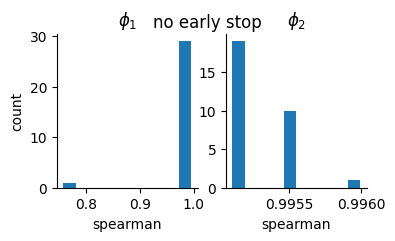

In [8]:
from tqdm import tqdm 
results = []
for id in tqdm(range(30)):
    model = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 0)
    dlim_regressor = DLIM_API(model=model, flag_spectral=True)
    losses = dlim_regressor.fit(train_data, test_data = None, lr = 1e-3, nb_epoch=300, batch_size=32, emb_regularization=0, \
                                save_path= model_save_path)
    fit_a, var_a, lat_a = dlim_regressor.predict(val_data.data[:,:-1], detach=True) 
    r1 = spearmanr(dlim_regressor.model.genes_emb[0].detach(), data_simulated.A)[0]
    r2 = spearmanr(dlim_regressor.model.genes_emb[1].detach(), data_simulated.B)[0]
    results += [[r1, r2]]
res_pd = pd.DataFrame(results, columns=['spearman 1', 'spearman 2'])
fig, axes = plt.subplots(1,2, figsize = (4, 2))
axes[0].hist(res_pd['spearman 1'].apply(lambda x: abs(x)))
axes[1].hist(res_pd['spearman 2'].apply(lambda x: abs(x)))
axes[0].set_title('$\phi_1$')
axes[1].set_title('$\phi_2$')
axes[0].set_ylabel('count')
axes[0].set_xlabel('spearman')
axes[1].set_xlabel('spearman')
for xx in axes:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)
fig.suptitle('no early stop')

In [9]:
# type_f = "tgaus"
type_f = "tgaus" 
nb_var = 30
data_simulated = Simulated(nb_var, type_f)
data = Data_model(data=pd.DataFrame(data_simulated.data), n_variables=2)
model_save_path = None 

train_id_all = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)
train_id = choice(train_id_all, int(len(train_id_all)*0.9), replace=False)
test_id = [i for i in train_id_all if i not in train_id]
val_id = [i for i in range(data.data.shape[0]) if i not in train_id_all]
train_data = data.subset(train_id)
test_data =  data.subset(test_id)
val_data = data.subset(val_id)

  0%|          | 0/30 [00:00<?, ?it/s]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


  3%|▎         | 1/30 [00:04<02:18,  4.79s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


  7%|▋         | 2/30 [00:09<02:16,  4.88s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 10%|█         | 3/30 [00:14<02:15,  5.03s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 13%|█▎        | 4/30 [00:20<02:16,  5.25s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 17%|█▋        | 5/30 [00:25<02:12,  5.29s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 20%|██        | 6/30 [00:31<02:06,  5.26s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 23%|██▎       | 7/30 [00:36<01:58,  5.17s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 27%|██▋       | 8/30 [00:41<01:55,  5.23s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 30%|███       | 9/30 [00:46<01:50,  5.26s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 33%|███▎      | 10/30 [00:51<01:43,  5.18s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 37%|███▋      | 11/30 [00:56<01:36,  5.07s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 40%|████      | 12/30 [01:01<01:30,  5.02s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 43%|████▎     | 13/30 [01:06<01:24,  4.99s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 47%|████▋     | 14/30 [01:11<01:20,  5.01s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 50%|█████     | 15/30 [01:16<01:16,  5.08s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 53%|█████▎    | 16/30 [01:21<01:11,  5.09s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 57%|█████▋    | 17/30 [01:26<01:06,  5.11s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 60%|██████    | 18/30 [01:32<01:01,  5.11s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 63%|██████▎   | 19/30 [01:37<00:55,  5.08s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 67%|██████▋   | 20/30 [01:42<00:51,  5.13s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 70%|███████   | 21/30 [01:47<00:47,  5.26s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 73%|███████▎  | 22/30 [01:53<00:43,  5.38s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 77%|███████▋  | 23/30 [01:58<00:37,  5.37s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 80%|████████  | 24/30 [02:04<00:31,  5.30s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 83%|████████▎ | 25/30 [02:09<00:27,  5.40s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 87%|████████▋ | 26/30 [02:16<00:23,  5.81s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 90%|█████████ | 27/30 [02:22<00:17,  5.81s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 93%|█████████▎| 28/30 [02:27<00:11,  5.75s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 97%|█████████▋| 29/30 [02:33<00:05,  5.67s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


100%|██████████| 30/30 [02:38<00:00,  5.29s/it]


Text(0.5, 0.98, 'no early stop')

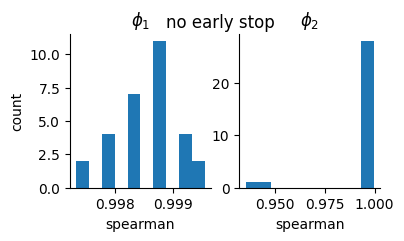

In [10]:
from tqdm import tqdm 
results = []
for id in tqdm(range(30)):
    model = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 0)
    dlim_regressor = DLIM_API(model=model, flag_spectral=True)
    losses = dlim_regressor.fit(train_data, test_data = None, lr = 1e-3, nb_epoch=300, batch_size=32, emb_regularization=0, \
                                save_path= model_save_path)
    fit_a, var_a, lat_a = dlim_regressor.predict(val_data.data[:,:-1], detach=True) 
    r1 = spearmanr(dlim_regressor.model.genes_emb[0].detach(), data_simulated.A)[0]
    r2 = spearmanr(dlim_regressor.model.genes_emb[1].detach(), data_simulated.B)[0]
    results += [[r1, r2]]
res_pd = pd.DataFrame(results, columns=['spearman 1', 'spearman 2'])
fig, axes = plt.subplots(1,2, figsize = (4, 2))
axes[0].hist(res_pd['spearman 1'].apply(lambda x: abs(x)))
axes[1].hist(res_pd['spearman 2'].apply(lambda x: abs(x)))
axes[0].set_title('$\phi_1$')
axes[1].set_title('$\phi_2$')
axes[0].set_ylabel('count')
axes[0].set_xlabel('spearman')
axes[1].set_xlabel('spearman')
for xx in axes:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)
fig.suptitle('no early stop')

  0%|          | 0/30 [00:00<?, ?it/s]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


  3%|▎         | 1/30 [00:02<00:59,  2.05s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


  7%|▋         | 2/30 [00:05<01:15,  2.71s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 10%|█         | 3/30 [00:09<01:28,  3.29s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 13%|█▎        | 4/30 [00:12<01:29,  3.45s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 17%|█▋        | 5/30 [00:16<01:31,  3.66s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 20%|██        | 6/30 [00:18<01:11,  2.99s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 23%|██▎       | 7/30 [00:22<01:14,  3.25s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 27%|██▋       | 8/30 [00:26<01:16,  3.48s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 30%|███       | 9/30 [00:28<01:05,  3.10s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 33%|███▎      | 10/30 [00:31<00:59,  2.99s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 37%|███▋      | 11/30 [00:34<00:59,  3.15s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 40%|████      | 12/30 [00:38<00:56,  3.13s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 43%|████▎     | 13/30 [00:42<01:00,  3.56s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 47%|████▋     | 14/30 [00:45<00:51,  3.25s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 50%|█████     | 15/30 [00:47<00:45,  3.03s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 53%|█████▎    | 16/30 [00:51<00:47,  3.39s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 57%|█████▋    | 17/30 [00:55<00:43,  3.35s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 60%|██████    | 18/30 [00:58<00:39,  3.30s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 63%|██████▎   | 19/30 [01:01<00:36,  3.28s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 67%|██████▋   | 20/30 [01:03<00:28,  2.86s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 70%|███████   | 21/30 [01:06<00:25,  2.79s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 73%|███████▎  | 22/30 [01:09<00:22,  2.85s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 77%|███████▋  | 23/30 [01:11<00:19,  2.74s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 80%|████████  | 24/30 [01:14<00:16,  2.75s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 83%|████████▎ | 25/30 [01:16<00:13,  2.73s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 87%|████████▋ | 26/30 [01:19<00:10,  2.65s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 90%|█████████ | 27/30 [01:21<00:07,  2.53s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 93%|█████████▎| 28/30 [01:24<00:05,  2.56s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


 97%|█████████▋| 29/30 [01:27<00:02,  2.70s/it]

spectral gap = 0.4712241291999817
spectral gap = 0.47698330879211426


100%|██████████| 30/30 [01:30<00:00,  3.01s/it]


Text(0.5, 0.98, 'with early stop')

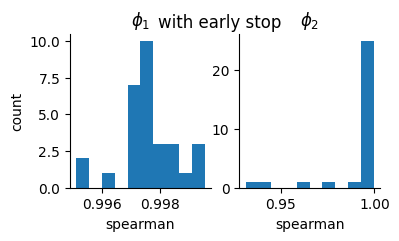

In [11]:
from tqdm import tqdm 
results = []
for id in tqdm(range(30)):
    model = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 0)
    dlim_regressor = DLIM_API(model=model, flag_spectral=True)
    losses = dlim_regressor.fit(train_data, test_data = test_data, lr = 1e-3, nb_epoch=300, batch_size=32, emb_regularization=0, \
                                save_path= model_save_path)
    fit_a, var_a, lat_a = dlim_regressor.predict(val_data.data[:,:-1], detach=True) 
    r1 = spearmanr(dlim_regressor.model.genes_emb[0].detach(), data_simulated.A)[0]
    r2 = spearmanr(dlim_regressor.model.genes_emb[1].detach(), data_simulated.B)[0]
    results += [[r1, r2]]
res_pd = pd.DataFrame(results, columns=['spearman 1', 'spearman 2'])
fig, axes = plt.subplots(1,2, figsize = (4, 2))
axes[0].hist(res_pd['spearman 1'].apply(lambda x: abs(x)))
axes[1].hist(res_pd['spearman 2'].apply(lambda x: abs(x)))
axes[0].set_title('$\phi_1$')
axes[1].set_title('$\phi_2$')
axes[0].set_ylabel('count')
axes[0].set_xlabel('spearman')
axes[1].set_xlabel('spearman')
for xx in axes:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)
fig.suptitle('with early stop')